# Thesis Fig.4.6: Density plots and correlation matrices for SNPE

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:
prior = torch.distributions.uniform.Uniform(torch.tensor(prior_min), torch.tensor(prior_max))

In [6]:

from utils import inference

In [7]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os


file = 'multi_round_17params'



print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))


/home/ubuntu
/home/ubuntu/results


In [8]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((1000,), not_within_prior=False)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

acceptance rate:  0.0


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/nflows/transforms/lu.py:81: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs.t(), lower, upper=False, unitriangular=True
                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 999 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normaliz

acceptance rate:  9.09090909090909e-05
acceptance rate:  9.523809523809524e-05
acceptance rate:  6.451612903225807e-05
acceptance rate:  4.878048780487805e-05
acceptance rate:  5.882352941176471e-05
acceptance rate:  4.9180327868852456e-05
acceptance rate:  4.225352112676056e-05
acceptance rate:  3.7037037037037037e-05
acceptance rate:  3.2967032967032964e-05
acceptance rate:  2.9702970297029702e-05
acceptance rate:  2.7027027027027027e-05
acceptance rate:  2.4793388429752065e-05
acceptance rate:  3.0534351145038166e-05
acceptance rate:  2.8368794326241135e-05
acceptance rate:  2.649006622516556e-05
acceptance rate:  2.484472049689441e-05
acceptance rate:  2.3391812865497078e-05
acceptance rate:  3.867403314917127e-05
acceptance rate:  3.664921465968586e-05
acceptance rate:  3.482587064676617e-05
acceptance rate:  3.3175355450236966e-05
acceptance rate:  3.167420814479638e-05
acceptance rate:  3.0303030303030302e-05
acceptance rate:  4.149377593360996e-05
acceptance rate:  3.9840637450

In [9]:
torch.save(samples,'samples_multi.pt')

In [10]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [11]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.1

print(diff)

list_min = list(torch.nn.functional.relu(list_min) - diff)
#list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([4.5072e-03, 4.6406e-03, 8.3581e-04, 4.7526e-04, 4.2499e-07, 1.7466e+01,
        4.9098e-08, 2.0166e-06, 1.5038e-04, 4.5150e-02, 6.9058e-04, 6.0409e+01,
        1.5306e-02, 9.8919e-01, 9.4776e-04, 7.1203e-05, 1.1475e+02])
tensor([3.9139e-01, 1.5760e-01, 2.0901e+00, 9.9786e-01, 5.6934e-03, 2.6937e+01,
        4.1971e-05, 3.9332e-02, 2.5898e-02, 2.0184e-01, 1.1700e-01, 6.3881e+01,
        8.6210e+00, 4.1015e+00, 9.9252e-01, 1.5790e-01, 1.2581e+02])
tensor([3.8689e-02, 1.5296e-02, 2.0893e-01, 9.9738e-02, 5.6929e-04, 9.4706e-01,
        4.1922e-06, 3.9330e-03, 2.5748e-03, 1.5669e-02, 1.1631e-02, 3.4719e-01,
        8.6057e-01, 3.1123e-01, 9.9157e-02, 1.5783e-02, 1.1060e+00])


In [12]:
##better limits:
list_max2 = torch.cat((true_params[0].unsqueeze(0), torch.tensor(list_max).unsqueeze(0)), dim=0) 
list_max3 = torch.max(list_max2, 0)

list_min2 = torch.cat((true_params[0].unsqueeze(0), torch.tensor(list_min).unsqueeze(0)), dim=0) 
list_min3 = torch.min(list_min2, 0)

limits = [list(tup) for tup in zip(list_min3.values, list_max3.values)]

<Figure size 432x288 with 0 Axes>

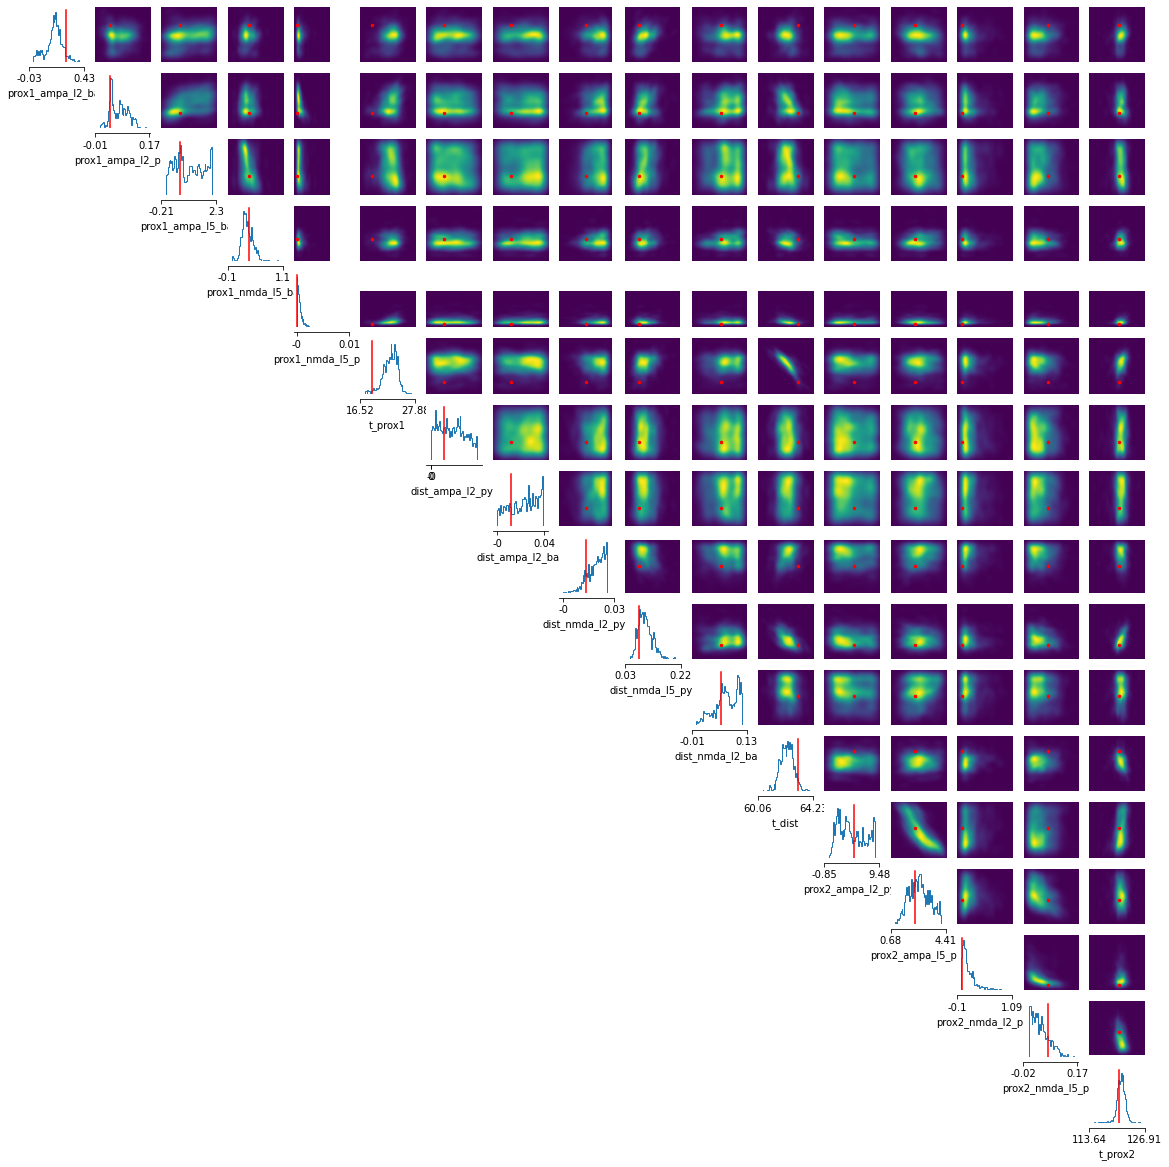

In [13]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)



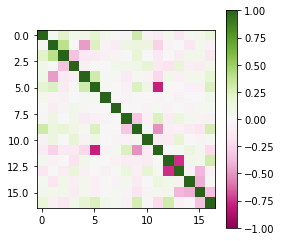

In [14]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [15]:
cond_coeff_mat_list = []


## for the conditional correlation matrix, we had to take the posterior from the second round because leakage was too huge 
## for the third round

#posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))

#posterior = posteriors_round[1]

for i in range(5):
    condition = posterior.sample((1,))
    cond_coeff_mat = conditional_corrcoeff(
        density=posterior,
        condition=condition,
        limits=torch.tensor([[-2., 2.]]*17),
    )
    cond_coeff_mat_list.append(cond_coeff_mat)
    
  

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining -1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.00019998000199980003


                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 9999 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0001
acceptance rate:  5e-05
acceptance rate:  6.666666666666667e-05
acceptance rate:  7.5e-05
acceptance rate:  6e-05
acceptance rate:  6.666666666666667e-05
acceptance rate:  5.714285714285714e-05
acceptance rate:  7.5e-05
acceptance rate:  6.666666666666667e-05
acceptance rate:  6e-05
acceptance rate:  7.272727272727273e-05
acceptance rate:  6.666666666666667e-05
acceptance rate:  6.153846153846154e-05
acceptance rate:  6.428571428571429e-05
acceptance rate:  6e-05
acceptance rate:  5.625e-05
acceptance rate:  6.470588235294117e-05
acceptance rate:  6.666666666666667e-05
acceptance rate:  6.842105263157895e-05
acceptance rate:  7.5e-05
acceptance rate:  7.619047619047618e-05
acceptance rate:  7.272727272727273e-05
acceptance rate:  7.391304347826086e-05
acceptance rate:  7.083333333333334e-05
acceptance rate:  7.2e-05
acceptance rate:  7.692307692307693e-05
acceptance rate:  7.407407407407407e-05
acceptance rate:  7.142857142857143e-05
acceptance rate:  7.2413793

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  3.333222225925803e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  4.999750012499375e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  3.333222225925803e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 0 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  9.999000099990002e-05


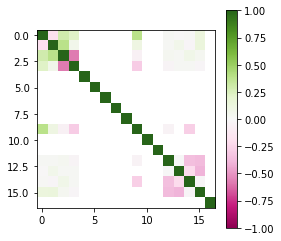

In [16]:
cond_coeff_mat_tensor = torch.stack(cond_coeff_mat_list, dim=0)

#take average:
cond_coeff_mat_av = torch.nanmean(cond_coeff_mat_tensor, dim=0)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat_av, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)